1/1 [==============================] - 0s 133ms/step


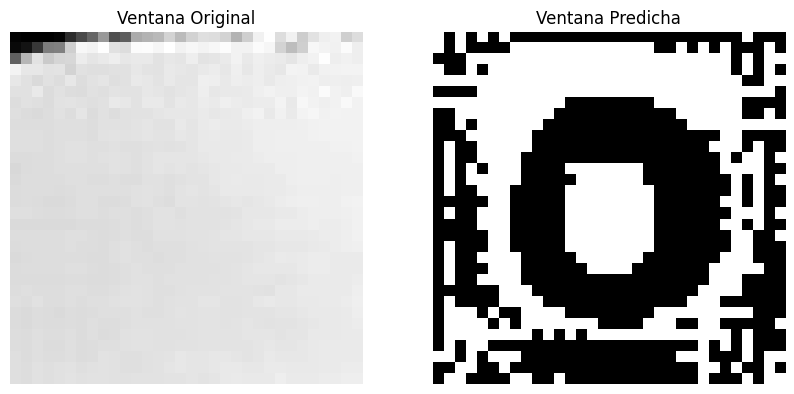

In [6]:
from tensorflow.keras.models import load_model
import matplotlib.pyplot as plt
import cv2
import numpy as np

# Función para dividir la imagen en ventanas de tamaño especificado
def dividir_en_ventanas(imagen, tamano_ventana):
    ventanas = []
    posiciones = []
    alto, ancho = imagen.shape
    for y in range(0, alto, tamano_ventana):
        for x in range(0, ancho, tamano_ventana):
            ventana = imagen[y:y+tamano_ventana, x:x+tamano_ventana]
            if ventana.shape[0] == tamano_ventana and ventana.shape[1] == tamano_ventana:
                ventanas.append(ventana)
                posiciones.append((y, x))
    return np.array(ventanas), posiciones

# Cargar el modelo entrenado
model = load_model('unet_model_2.h5')

# Cargar una imagen de test en escala de grises
imagen_test_path = './Descargas_BSDS500/imgs/6046.jpg'
imagen_test = cv2.imread(imagen_test_path, cv2.IMREAD_GRAYSCALE)

# Normalizar la imagen de test
imagen_test = imagen_test / 255.0

tamano_ventana = 32  # Debe ser el mismo tamaño que el utilizado durante el entrenamiento
ventanas, posiciones = dividir_en_ventanas(imagen_test, tamano_ventana)

# Seleccionar una ventana (por ejemplo, la primera ventana)
ventana = ventanas[0]
posicion = posiciones[0]

# Expandir dimensiones para que la ventana tenga el formato (1, 32, 32, 1)
ventana = np.expand_dims(ventana, axis=(0, -1))

# Predecir la ventana utilizando el modelo
ventana_predicha = model.predict(ventana, batch_size=1)

# Des-normalizar la ventana predicha
ventana_predicha = (ventana_predicha.squeeze() * 255.0).astype(np.uint8)

# Mostrar la ventana original y la ventana predicha
plt.figure(figsize=(10, 5))
plt.subplot(1, 2, 1)
plt.title('Ventana Original')
plt.imshow(ventana.squeeze() * 255.0, cmap='gray')  # Des-normalizar para visualizar
plt.axis('off')
plt.subplot(1, 2, 2)
plt.title('Ventana Predicha')
plt.imshow(ventana_predicha, cmap='gray')
plt.axis('off')
plt.show()
